In [ ]:
%cd /content/drive/MyDrive/CS331

/content/drive/.shortcut-targets-by-id/1Om9LxRCPF7VAUyuoIWBEB0nyTFC4A--f/CS331


In [3]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.


In [4]:
import os
import dlib
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates


In [5]:
places = ['train','test']
shapes = ['heart', 'oval','oblong','square','round']

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=0, circle_radius=0)

In [ ]:
savePath = 'imageDropData'

In [ ]:
for place in places:
    for shape in shapes:
        path  = os.path.join('data', place, shape)
        IMAGE_FILES = os.listdir(path)
        with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
            for idx, file in enumerate(IMAGE_FILES):
                print(os.path.join(path, file))
                image = cv2.imread(os.path.join(path, file))
                image_rows, image_cols, _ = image.shape
                # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
                results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                if not results.detections:
                    continue
                annotated_image = image.copy()
                for detection in results.detections:
                    relative_bounding_box = detection.location_data.relative_bounding_box
                    rect_start_point = _normalized_to_pixel_coordinates(
                                                relative_bounding_box.xmin, 
                                                relative_bounding_box.ymin, 
                                                image_cols,
                                                image_rows)
                    rect_end_point = _normalized_to_pixel_coordinates(
                                                relative_bounding_box.xmin + relative_bounding_box.width,
                                                relative_bounding_box.ymin + relative_bounding_box.height, 
                                                image_cols,
                                                image_rows) 
                    xLeft,yTop = rect_start_point
                    xRight,yBot = rect_end_point
                    bboxWidth = xRight - xLeft
                    bboxHeight = yBot - yTop
                    INCREASE  = 25
                    if xLeft-bboxWidth*INCREASE//100 > 0:
                            newXLeft = xLeft-bboxWidth*(INCREASE-25)//100
                    else: newXLeft = 0

                    if yTop-bboxWidth*INCREASE//100 > 0:
                            newYTOP = yTop-bboxWidth*INCREASE//100
                    else: newYTOP = 0



                    newXRight = xRight+bboxWidth*(INCREASE-25)//100
                    newYBOT = yBot+bboxWidth*(INCREASE-20)//100

                    crop_image = image[newYTOP: newYBOT, 
                                    newXLeft: newXRight]
                    cv2.imwrite(os.path.join(savePath, place, shape, shape + f'{idx}.jpg'), crop_image)



(325, 257, 3)


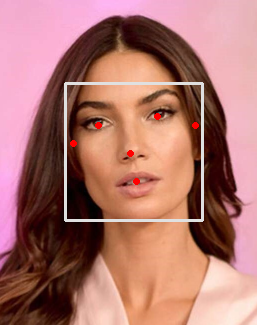

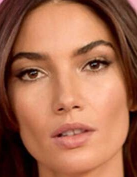

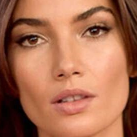

In [10]:
IMAGE_FILES = ['/content/drive/MyDrive/CS331/data/train/square/square (652).jpg']
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))
        print(image.shape)
        image_rows, image_cols, _ = image.shape
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Draw face detections of each face.
        if not results.detections:
            continue
        annotated_image = image.copy()
        for detection in results.detections:
            mp_drawing.draw_detection(annotated_image, detection)
            cv2_imshow(annotated_image) 

            relative_bounding_box = detection.location_data.relative_bounding_box
            rect_start_point = _normalized_to_pixel_coordinates(
                                        relative_bounding_box.xmin, 
                                        relative_bounding_box.ymin, 
                                        image_cols,
                                        image_rows)
            rect_end_point = _normalized_to_pixel_coordinates(
                                        relative_bounding_box.xmin + relative_bounding_box.width,
                                        relative_bounding_box.ymin + relative_bounding_box.height, 
                                        image_cols,
                                        image_rows)
            xLeft,yTop = rect_start_point
            xRight,yBot = rect_end_point
            bboxWidth = xRight - xLeft
            bboxHeight = yBot - yTop
            INCREASE  = 25
            if xLeft-bboxWidth*INCREASE//100 > 0:
                    newXLeft = xLeft-bboxWidth*(INCREASE-25)//100
            else: newXLeft = 0

            if yTop-bboxWidth*INCREASE//100 > 0:
                    newYTOP = yTop-bboxWidth*INCREASE//100
            else: newYTOP = 0



            newXRight = xRight+bboxWidth*(INCREASE-25)//100
            newYBOT = yBot+bboxWidth*(INCREASE-20)//100

            crop_image1 = image[newYTOP: newYBOT, 
                            newXLeft: newXRight]
            crop_image2 = image[yTop: yBot, 
                            xLeft: xRight]
cv2_imshow(crop_image1)
cv2_imshow(crop_image2)